In [ ]:
print(ø)

In [7]:
!ls

IRCAD_Load.ipynb	     save_interactive_volume_slicer.py
Untitled.ipynb		     slice_results.ipynb
__pycache__		     spleen_segmentation_3d.ipynb
hepaticDataExploration.csv   test_performance_analysis.ipynb
hepatic_visualization.ipynb  volvizplotly.py
patches_retinal.ipynb	     wandb_data.pkl
plotly_visualization.ipynb   wandb_data_old.pkl
rat3.ipynb


#Imports and setup

In [4]:
cd ..
# goes back to home folder

SyntaxError: invalid syntax (2906151893.py, line 1)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
from monai.transforms import (
    AsDiscreted,
    Activationsd,
    Compose,
    Invertd,
)
from monai.inferers import sliding_window_inference
from monai.data import decollate_batch

from src.data.hepatic_dataset import val_transforms
from src.models.unet_model import load_unet

In [99]:
# What models do we need to make inference from?
models_dict = {
    "final_3drpl_inc_enc_lp_1.0" : "models/finetune-kfold/model_16753090.pth",
    "final_3drpl_inc_enc_lp_0.01" : "models/finetune-kfold/model_16753060.pth",
    "final_transfer_inc_enc_lp_1.0": "models/finetune-kfold/model_16761135.pth"
}

# Only increasing learning rates
models_list = [{
                    "3drpl_lp_0.01" : "../models/finetune-kfold/model_16753060.pth",
                    "transfer_lp_0.01": "../models/finetune-kfold/model_16761102.pth", 
                    "random_lp_0.01" : "../models/finetune-kfold/model_16752008.pth", 
                },
                    {
                    "3drpl_lp_0.02" : "../models/finetune-kfold/model_16753065.pth", 
                    "transfer_lp_0.02": "../models/finetune-kfold/model_16761108.pth", 
                    "random_lp_0.02" : "../models/finetune-kfold/model_16752014.pth", 
                    },
               {
                   "3drpl_lp_0.03" : "../models/finetune-kfold/model_16753070.pth", 
                    "transfer_lp_0.03": "../models/finetune-kfold/model_16761114.pth", 
                    "random_lp_0.03" : "../models/finetune-kfold/model_16752019.pth", 
               },
                {
                    "3drpl_lp_0.05" : "../models/finetune-kfold/model_16753075.pth", 
                    "transfer_lp_0.05": "../models/finetune-kfold/model_16761119.pth", 
                    "random_lp_0.05" : "../models/finetune-kfold/model_16752026.pth", 
                    },
               
               {
                    "3drpl_lp_0.07" : "../models/finetune-kfold/model_16753078.pth",
                    "transfer_lp_0.07": "../models/finetune-kfold/model_16772244.pth",
                    "random_lp_0.07" : "../models/finetune-kfold/model_16752027.pth",
                    },
                    
                {
                    "3drpl_lp_0.10" : "../models/finetune-kfold/model_16753081.pth",
                    "transfer_lp_0.10": "../models/finetune-kfold/model_16761129.pth",
                    "random_lp_0.10" : "../models/finetune-kfold/model_16752034.pth",
                    },
               
               {
                "3drpl_lp_1.0" : "../models/finetune-kfold/model_16753090.pth",
                "transfer_lp_1.0": "../models/finetune-kfold/model_16761135.pth",
                "random_lp_1.0" : "../models/finetune-kfold/model_16752039.pth",   
               },
              ]

# Only increasing learning rates
models_list_updated = [{
                    "3drpl_lp_0.01" : "../models/finetune-kfold/model_16753060.pth",
                    "transfer_lp_0.01": "../models/finetune-kfold/model_16761105.pth", 
                    "random_lp_0.01" : "../models/finetune-kfold/model_16752009.pth", 
                },
                    {
                    "3drpl_lp_0.02" : "../models/finetune-kfold/model_16753065.pth", 
                    "transfer_lp_0.02": "../models/finetune-kfold/model_16761110.pth",
                    "random_lp_0.02" : "../models/finetune-kfold/model_16752015.pth", 
                    },
               {
                   "3drpl_lp_0.03" : "../models/finetune-kfold/model_16753070.pth", 
                    "transfer_lp_0.03": "../models/finetune-kfold/model_16761116.pth", 
                    "random_lp_0.03" : "../models/finetune-kfold/model_16752021.pth",
               },
                {
                    "3drpl_lp_0.05" : "../models/finetune-kfold/model_16753075.pth", 
                    "transfer_lp_0.05": "../models/finetune-kfold/model_16761121.pth", 
                    "random_lp_0.05" : "../models/finetune-kfold/model_16752026.pth", 
                    },
               
               {
                    "3drpl_lp_0.07" : "../models/finetune-kfold/model_16753080.pth",
                    "transfer_lp_0.07": "../models/finetune-kfold/model_16761126.pth",
                    "random_lp_0.07" : "../models/finetune-kfold/model_16752031.pth",
                    },
                    
                {
                    "3drpl_lp_0.10" : "../models/finetune-kfold/model_16753085.pth",
                    "transfer_lp_0.10": "../models/finetune-kfold/model_16761131.pth",
                    "random_lp_0.10" : "../models/finetune-kfold/model_16752036.pth",
                    },
               
               {
                "3drpl_lp_1.0" : "../models/finetune-kfold/model_16753090.pth",
                "transfer_lp_1.0": "../models/finetune-kfold/model_16761137.pth",
                "random_lp_1.0" : "../models/finetune-kfold/model_16752041.pth",   
               },
              ]

In [9]:
ls

IRCAD_Load.ipynb             save_interactive_volume_slicer.py
Untitled.ipynb               slice_results.ipynb
__pycache__/                 spleen_segmentation_3d.ipynb
hepaticDataExploration.csv   test_performance_analysis.ipynb
hepatic_visualization.ipynb  volvizplotly.py
patches_retinal.ipynb        wandb_data.pkl
plotly_visualization.ipynb   wandb_data_old.pkl
rat3.ipynb


# Functions

In [144]:
# loads single image
device = 'cpu'

# images to load
image_data_list = [
                    {'image': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/imagesTr/hepaticvessel_00{i}.nii.gz', 
                     'label': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/labelsTr/hepaticvessel_00{i}.nii.gz'}
                    for i in [4]
                  ]

In [149]:
roi_size = (160, 160, 160)
sw_batch_size = 4

scan = image_data_list[0]
scan_transformed = val_transforms(scan)

# compute inferences, right now stores only single slices
predictions = []

for lp_model_dict in models_list_updated:
    
    models = [load_unet(value,device=device)[0] for value in lp_model_dict.values()]

    # loops over each model in the label proportion
    lp_predictions = [] # Will store predictions from models in order: 3d-rpl, transfer, random
    for model in models:
        model.eval()
        with torch.no_grad():
            prediction = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)
            lp_predictions.append(torch.argmax(prediction, dim=1)[0, :, :, 60])

    predictions.append(lp_predictions)

In [150]:
def plot_2D(predictions, scan, transform, device = 'cpu',depth=20):

    # Set titles for each column
    col_titles = ['Image', 'Label','Threshold','3D-RPL', 'Transfer', 'Random']
    row_titles = ['1% LP','2% LP', '3% LP', '5% LP', '7% LP', '10% LP', '100% LP']
    roi_size = (160, 160, 160)
    sw_batch_size = 4
    
    # create plot    
    #plt.axis('off')
    
    # create plot    
    plt.figure(figsize=(36, 30))  # Set the figure size to be larger
    fig, axs = plt.subplots(nrows=7, ncols=6, gridspec_kw={'hspace': 0.15, 'wspace': -0.5})
    #plt.tight_layout()

    scan_transformed = transform(scan)

    row = 0
    # Plot each prediction
    
    for lp_predictions in predictions:
        col = 0

        # Plot image
        axs[row, 0].imshow(np.rot90(scan_transformed['image'][0,:,:,depth]), cmap='gray')
    
        # Plot label
        axs[row, 1].imshow(np.rot90(scan_transformed['label'][0,:,:,depth]), cmap='gray')

        # Plot threshold
        lower_threshold = 0.4
        upper_threshold = 0.49
        threshold_img = torch.logical_and(scan_transformed['image'][0,:,:,depth] >= lower_threshold, scan_transformed['image'][0,:,:,depth]<= upper_threshold)     
        axs[row, col + 2].imshow(np.rot90(threshold_img.byte()), cmap='gray')

        # For each model prediction
        for i, model_prediction in enumerate(lp_predictions):
            axs[row, col+3+i].imshow(np.rot90(model_prediction), cmap = 'gray')
        
        axs[row, 0].set_ylabel(row_titles[row], rotation=0, labelpad=30, fontsize = 8)
        row += 1

    for i, ax in enumerate(axs[0]):
        ax.set_title(f'{col_titles[i]}', loc='center', pad=10, fontsize=8)

    # Remove axis ticks and labels
    for ax in axs.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
 
    plt.savefig('Slices.png', dpi = 500, bbox_inches='tight')
    

<Figure size 3600x3000 with 0 Axes>

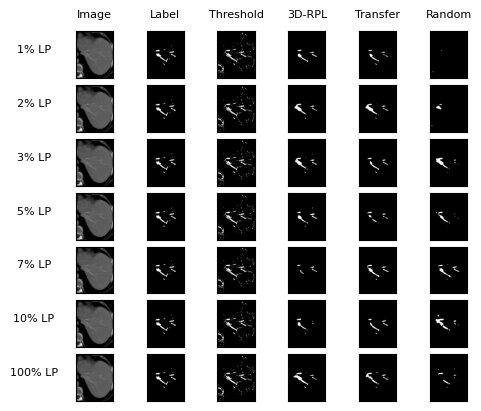

In [151]:
plot_2D(predictions, scan, transform=val_transforms, depth = 60)

# Display image slices

In [ ]:
# loads single image
device = 'cpu'

# images to load
image_data_list = [
                    {'image': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/imagesTr/hepaticvessel_{i}.nii.gz', 'label': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/labelsTr/hepaticvessel_{i}.nii.gz'}
                    for i in ["119", "185"]
                  ]

In [ ]:
# We now plot a single slice
#visualize_slices(models_list,image_data_list, val_transforms,post_transforms,depth=60,device=device)  # mmm mærkelig fejl
visualize_slice_all_models(models_list, image_data_list[1], val_transforms, post_transforms, device = 'cpu',depth=60)

In [ ]:
# We now plot a single slice
#visualize_slices(models_list,image_data_list, val_transforms,post_transforms,depth=60,device=device)  # mmm mærkelig fejl

In [ ]:
!ls

In [ ]:
post_transforms = Compose(
    [
        Invertd(
            keys="pred",
            transform=val_transforms,
            orig_keys="image",
            meta_keys="pred_meta_dict",
            orig_meta_keys="image_meta_dict",
            meta_key_postfix="meta_dict",
            nearest_interp=False,
            to_tensor=True,
        ),
        #AsDiscreted(keys="pred", argmax=True, to_onehot=2),
        Activationsd(keys="pred", softmax=True), 
        AsDiscreted(keys="pred", argmax=True),
        #SaveImaged(keys="pred", meta_keys="pred_meta_dict", output_dir='reports/save_prediction_mask', output_postfix="seg", resample=False),
    ]
)

def visualize_slices(models_dict, scan_list, transform, post_transforms, device = 'cpu',depth=20):
    # loads model into dict
    models_dict = {key: load_unet(value,device=device)[0] for key, value in models_dict.items()}
    
    #roi_size = (140, 140, 140) # we take the full image
    roi_size = (160, 160, 160)

    sw_batch_size = 4
    
    # create plot    
    plt.axis('off')
    fig = plt.figure(constrained_layout=True, figsize = (10,10))
    fig.suptitle('Figure title')
    subfigs = fig.subfigures(nrows=len(scan_list), ncols=1)

    # loops over each image
    for i, scan in enumerate(tqdm(scan_list)):   
        # sets title for row
        subfigs[i].suptitle(f'hepaticvessel_{scan["image"][-10:-7]}')
        # crates plots for row
        axs = subfigs[i].subplots(nrows=1, ncols=len(models_dict)+2)

        scan_transformed = transform(scan)

        # creates img and labl
        axs[0].imshow(scan_transformed['image'][0,:,:,depth], cmap='gray')
        axs[0].set_title('pre-processed \nimage')
        axs[1].imshow(scan_transformed['label'][0,:,:,depth], cmap='gray')
        axs[1].set_title('pre-processed \nlabel')

        # loops over each model
        for j, (name, model) in enumerate(tqdm(models_dict.items(),leave=False)):
            model.eval()
            with torch.no_grad():
                scan_transformed["pred"] = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)
            
                #scan_transformed = [post_transforms(i) for i in decollate_batch(scan_transformed)]
            
            axs[j+2].imshow(torch.argmax(scan_transformed['pred'], dim=1)[0, :, :, depth])
            axs[j+2].set_title(name)


def visualize_slice_all_models(models_list, scan, transform, post_transforms, device = 'cpu',depth=20):
    # loads model into dict
    #models_d = {key: load_unet(value,device=device)[0] for key, value in models_dict.items() }
    roi_size = (160, 160, 160)

    sw_batch_size = 4
    
    # create plot    
    plt.axis('off')
    #fig = plt.figure(constrained_layout=True)
    fig = plt.figure()
    fig.suptitle('Figure title')
    subfigs = fig.subfigures(nrows=2, ncols=1,wspace=0.07,hspace=-.5)
    
    # For each label proportion
    for i, lp in enumerate([0.01, 1.0]):
        models_dict = {key: load_unet(value,device=device)[0] for key, value in models_list[i].items() }

        #crates plots for row
        axs = subfigs[i].subplots(nrows=1, ncols=len(models_dict)+2)
    
        scan_transformed = transform(scan)
    
        # creates img and labl
        axs[0].imshow(scan_transformed['image'][0,:,:,depth], cmap='gray')
        axs[0].set_title('Image')
        axs[0].axis('off')
        axs[1].imshow(scan_transformed['label'][0,:,:,depth], cmap='gray')
        axs[1].set_title('Label')
        axs[1].axis('off')
    
        # loops over each model in the label proportion
        for j, (name, model) in enumerate(models_dict.items()):
            
            model.eval()
            with torch.no_grad():
                scan_transformed["pred"] = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)
            
                #scan_transformed = [post_transforms(i) for i in decollate_batch(scan_transformed)]
            
            axs[j+2].imshow(torch.argmax(scan_transformed['pred'], dim=1)[0, :, :, depth])
            axs[j+2].axis('off')
            axs[j+2].set_title(name)

        # Adjust the margins between the subplots so there are less air and more image
        plt.subplots_adjust(wspace=0.1, hspace=0.1)





    # For each label proportion
    for i, lp in enumerate([0.01, 0.02, 0.03, 0.05, 0.07, 0.10, 1.0]):
        models_dict = {key: load_unet(value,device=device)[0] for key, value in models_list[i].items() }
        scan_transformed = transform(scan)
    
        # Plot image and label
        axs[i, 0].imshow(scan_transformed['image'][0,:,:,depth], cmap='gray')
        axs[i, 1].imshow(scan_transformed['label'][0,:,:,depth], cmap='gray')
        
        # Plot threshold prediction 
        threshold_lower = 0.4
        threshold_upper = 0.49
        threshold_img = torch.logical_and(scan_transformed['image'][0,:,:,depth] >= lower_threshold, scan_transformed['image'][0,:,:,depth]<= upper_threshold)[0,:,:,:]     
        axs[i, 2].imshow(threshold_img.byte(), cmap='gray')
        
        # loops over each model in the label proportion
        for j, (name, model) in enumerate(models_dict.items()):
            
            model.eval()
            with torch.no_grad():
                scan_transformed["pred"] = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)   
            axs[i, j+3].imshow(torch.argmax(scan_transformed['pred'], dim=1)[0, :, :, depth])

In [ ]:
import pandas


In [ ]:
pandas.read_pickle('notebooks/wandb_data.pkl')

In [7]:
!ls

IRCAD_Load.ipynb	     save_interactive_volume_slicer.py
Untitled.ipynb		     slice_results.ipynb
__pycache__		     spleen_segmentation_3d.ipynb
hepaticDataExploration.csv   test_performance_analysis.ipynb
hepatic_visualization.ipynb  volvizplotly.py
patches_retinal.ipynb	     wandb_data.pkl
plotly_visualization.ipynb   wandb_data_old.pkl
rat3.ipynb


#Imports and setup

In [4]:
cd ..
# goes back to home folder

SyntaxError: invalid syntax (2906151893.py, line 1)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
from monai.transforms import (
    AsDiscreted,
    Activationsd,
    Compose,
    Invertd,
)
from monai.inferers import sliding_window_inference
from monai.data import decollate_batch

from src.data.hepatic_dataset import val_transforms
from src.models.unet_model import load_unet

In [26]:
# What models do we need to make inference from?
models_dict = {
    "final_3drpl_inc_enc_lp_1.0" : "models/finetune-kfold/model_16753090.pth",
    "final_3drpl_inc_enc_lp_0.01" : "models/finetune-kfold/model_16753060.pth",
    "final_transfer_inc_enc_lp_1.0": "models/finetune-kfold/model_16761135.pth"
}

# Only increasing learning rates
models_list = [{
                    "3drpl_lp_0.01" : "../models/finetune-kfold/model_16753060.pth",
                    "transfer_lp_0.01": "../models/finetune-kfold/model_16761102.pth",
                    "random_lp_0.01" : "../models/finetune-kfold/model_16752008.pth",
                },
                    {
                    "3drpl_lp_0.02" : "../models/finetune-kfold/model_16753065.pth",
                    "transfer_lp_0.02": "../models/finetune-kfold/model_16761108.pth",
                    "random_lp_0.02" : "../models/finetune-kfold/model_16752014.pth",
                    },
               {
                   "3drpl_lp_0.03" : "../models/finetune-kfold/model_16753070.pth",
                    "transfer_lp_0.03": "../models/finetune-kfold/model_16761114.pth",
                    "random_lp_0.03" : "../models/finetune-kfold/model_16752019.pth",
               },
                {
                    "3drpl_lp_0.05" : "../models/finetune-kfold/model_16753075.pth",
                    "transfer_lp_0.05": "../models/finetune-kfold/model_16761119.pth",
                    "random_lp_0.05" : "../models/finetune-kfold/model_16752026.pth",
                    },
               
               {
                    "3drpl_lp_0.07" : "../models/finetune-kfold/model_16753078.pth",
                    "transfer_lp_0.07": "../models/finetune-kfold/model_16772244.pth",
                    "random_lp_0.07" : "../models/finetune-kfold/model_16752027.pth",
                    },
                    
                {
                    "3drpl_lp_0.10" : "../models/finetune-kfold/model_16753081.pth",
                    "transfer_lp_0.10": "../models/finetune-kfold/model_16761129.pth",
                    "random_lp_0.10" : "../models/finetune-kfold/model_16752034.pth",
                    },
               
               {
                "3drpl_lp_1.0" : "../models/finetune-kfold/model_16753090.pth",
                "transfer_lp_1.0": "../models/finetune-kfold/model_16761135.pth",
                "random_lp_1.0" : "../models/finetune-kfold/model_16752039.pth",   
               },
              ]

In [9]:
ls

IRCAD_Load.ipynb             save_interactive_volume_slicer.py
Untitled.ipynb               slice_results.ipynb
__pycache__/                 spleen_segmentation_3d.ipynb
hepaticDataExploration.csv   test_performance_analysis.ipynb
hepatic_visualization.ipynb  volvizplotly.py
patches_retinal.ipynb        wandb_data.pkl
plotly_visualization.ipynb   wandb_data_old.pkl
rat3.ipynb


# Functions

In [67]:
# loads single image
device = 'cpu'

# images to load
image_data_list = [
                    {'image': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/imagesTr/hepaticvessel_{i}.nii.gz', 
                     'label': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/labelsTr/hepaticvessel_{i}.nii.gz'}
                    for i in [193]
                  ]

In [81]:
roi_size = (160, 160, 160)
sw_batch_size = 4

scan = image_data_list[0]
scan_transformed = val_transforms(scan)

# compute inferences, right now stores only single slices
predictions = []

for lp_model_dict in models_list:
    
    models = [load_unet(value,device=device)[0] for value in lp_model_dict.values()]

    # loops over each model in the label proportion
    lp_predictions = [] # Will store predictions from models in order: 3d-rpl, transfer, random
    for model in models:
        model.eval()
        with torch.no_grad():
            prediction = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)
            lp_predictions.append(torch.argmax(prediction, dim=1)[0, :, :, 42])

    predictions.append(lp_predictions)

In [96]:
def plot_2D(predictions, scan, transform, device = 'cpu',depth=50):

    # Set titles for each column
    col_titles = ['Image', 'Label','Threshold','3D-RPL', 'Transfer', 'Random']
    row_titles = ['1% LP','2% LP', '3% LP', '5% LP', '7% LP', '10% LP', '100% LP']
    roi_size = (160, 160, 160)
    sw_batch_size = 4
    
    # create plot    
    #plt.axis('off')
    
    # create plot    
    plt.figure(figsize=(36, 30))  # Set the figure size to be larger
    fig, axs = plt.subplots(nrows=7, ncols=6, gridspec_kw={'hspace': 0.15, 'wspace': -0.75})
    #plt.tight_layout()

    scan_transformed = transform(scan)

    row = 0
    # Plot each prediction
    
    for lp_predictions in predictions:
        col = 0

        # Plot image
        axs[row, 0].imshow(np.rot90(scan_transformed['image'][0,:,:,depth]), cmap='gray')
    
        # Plot label
        axs[row, 1].imshow(np.rot90(scan_transformed['label'][0,:,:,depth]), cmap='gray')

        # Plot threshold
        lower_threshold = 0.4
        upper_threshold = 0.49
        threshold_img = torch.logical_and(scan_transformed['image'][0,:,:,depth] >= lower_threshold, scan_transformed['image'][0,:,:,depth]<= upper_threshold)     
        axs[row, col + 2].imshow(np.rot90(threshold_img.byte()), cmap='gray')

        # For each model prediction
        for i, model_prediction in enumerate(lp_predictions):
            axs[row, col+3+i].imshow(np.rot90(model_prediction), cmap = 'gray')
        
        axs[row, 0].set_ylabel(row_titles[row], rotation=0, labelpad=30, fontsize = 8)
        row += 1

    for i, ax in enumerate(axs[0]):
        ax.set_title(f'{col_titles[i]}', loc='center', pad=10, fontsize=8)

    # Remove axis ticks and labels
    for ax in axs.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
 
    plt.savefig('Slices.png', dpi = 500, bbox_inches='tight')
    

<Figure size 3600x3000 with 0 Axes>

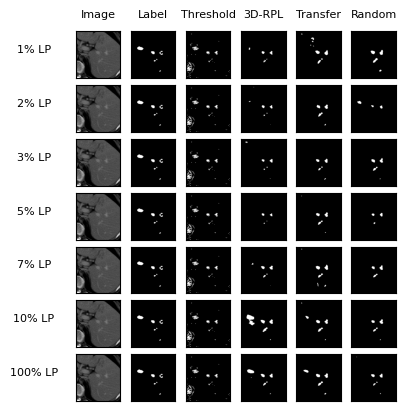

In [97]:
plot_2D(predictions, scan, transform=val_transforms, depth = 42)

# Display image slices

In [ ]:
# loads single image
device = 'cpu'

# images to load
image_data_list = [
                    {'image': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/imagesTr/hepaticvessel_{i}.nii.gz', 'label': f'/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/labelsTr/hepaticvessel_{i}.nii.gz'}
                    for i in ["119", "185"]
                  ]

In [ ]:
# We now plot a single slice
#visualize_slices(models_list,image_data_list, val_transforms,post_transforms,depth=60,device=device)  # mmm mærkelig fejl
visualize_slice_all_models(models_list, image_data_list[1], val_transforms, post_transforms, device = 'cpu',depth=60)

In [ ]:
# We now plot a single slice
#visualize_slices(models_list,image_data_list, val_transforms,post_transforms,depth=60,device=device)  # mmm mærkelig fejl

In [ ]:
!ls

In [ ]:
post_transforms = Compose(
    [
        Invertd(
            keys="pred",
            transform=val_transforms,
            orig_keys="image",
            meta_keys="pred_meta_dict",
            orig_meta_keys="image_meta_dict",
            meta_key_postfix="meta_dict",
            nearest_interp=False,
            to_tensor=True,
        ),
        #AsDiscreted(keys="pred", argmax=True, to_onehot=2),
        Activationsd(keys="pred", softmax=True), 
        AsDiscreted(keys="pred", argmax=True),
        #SaveImaged(keys="pred", meta_keys="pred_meta_dict", output_dir='reports/save_prediction_mask', output_postfix="seg", resample=False),
    ]
)

def visualize_slices(models_dict, scan_list, transform, post_transforms, device = 'cpu',depth=20):
    # loads model into dict
    models_dict = {key: load_unet(value,device=device)[0] for key, value in models_dict.items()}
    
    #roi_size = (140, 140, 140) # we take the full image
    roi_size = (160, 160, 160)

    sw_batch_size = 4
    
    # create plot    
    plt.axis('off')
    fig = plt.figure(constrained_layout=True, figsize = (10,10))
    fig.suptitle('Figure title')
    subfigs = fig.subfigures(nrows=len(scan_list), ncols=1)

    # loops over each image
    for i, scan in enumerate(tqdm(scan_list)):   
        # sets title for row
        subfigs[i].suptitle(f'hepaticvessel_{scan["image"][-10:-7]}')
        # crates plots for row
        axs = subfigs[i].subplots(nrows=1, ncols=len(models_dict)+2)

        scan_transformed = transform(scan)

        # creates img and labl
        axs[0].imshow(scan_transformed['image'][0,:,:,depth], cmap='gray')
        axs[0].set_title('pre-processed \nimage')
        axs[1].imshow(scan_transformed['label'][0,:,:,depth], cmap='gray')
        axs[1].set_title('pre-processed \nlabel')

        # loops over each model
        for j, (name, model) in enumerate(tqdm(models_dict.items(),leave=False)):
            model.eval()
            with torch.no_grad():
                scan_transformed["pred"] = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)
            
                #scan_transformed = [post_transforms(i) for i in decollate_batch(scan_transformed)]
            
            axs[j+2].imshow(torch.argmax(scan_transformed['pred'], dim=1)[0, :, :, depth])
            axs[j+2].set_title(name)


def visualize_slice_all_models(models_list, scan, transform, post_transforms, device = 'cpu',depth=20):
    # loads model into dict
    #models_d = {key: load_unet(value,device=device)[0] for key, value in models_dict.items() }
    roi_size = (160, 160, 160)

    sw_batch_size = 4
    
    # create plot    
    plt.axis('off')
    #fig = plt.figure(constrained_layout=True)
    fig = plt.figure()
    fig.suptitle('Figure title')
    subfigs = fig.subfigures(nrows=2, ncols=1,wspace=0.07,hspace=-.5)
    
    # For each label proportion
    for i, lp in enumerate([0.01, 1.0]):
        models_dict = {key: load_unet(value,device=device)[0] for key, value in models_list[i].items() }

        #crates plots for row
        axs = subfigs[i].subplots(nrows=1, ncols=len(models_dict)+2)
    
        scan_transformed = transform(scan)
    
        # creates img and labl
        axs[0].imshow(scan_transformed['image'][0,:,:,depth], cmap='gray')
        axs[0].set_title('Image')
        axs[0].axis('off')
        axs[1].imshow(scan_transformed['label'][0,:,:,depth], cmap='gray')
        axs[1].set_title('Label')
        axs[1].axis('off')
    
        # loops over each model in the label proportion
        for j, (name, model) in enumerate(models_dict.items()):
            
            model.eval()
            with torch.no_grad():
                scan_transformed["pred"] = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)
            
                #scan_transformed = [post_transforms(i) for i in decollate_batch(scan_transformed)]
            
            axs[j+2].imshow(torch.argmax(scan_transformed['pred'], dim=1)[0, :, :, depth])
            axs[j+2].axis('off')
            axs[j+2].set_title(name)

        # Adjust the margins between the subplots so there are less air and more image
        plt.subplots_adjust(wspace=0.1, hspace=0.1)





    # For each label proportion
    for i, lp in enumerate([0.01, 0.02, 0.03, 0.05, 0.07, 0.10, 1.0]):
        models_dict = {key: load_unet(value,device=device)[0] for key, value in models_list[i].items() }
        scan_transformed = transform(scan)
    
        # Plot image and label
        axs[i, 0].imshow(scan_transformed['image'][0,:,:,depth], cmap='gray')
        axs[i, 1].imshow(scan_transformed['label'][0,:,:,depth], cmap='gray')
        
        # Plot threshold prediction 
        threshold_lower = 0.4
        threshold_upper = 0.49
        threshold_img = torch.logical_and(scan_transformed['image'][0,:,:,depth] >= lower_threshold, scan_transformed['image'][0,:,:,depth]<= upper_threshold)[0,:,:,:]     
        axs[i, 2].imshow(threshold_img.byte(), cmap='gray')
        
        # loops over each model in the label proportion
        for j, (name, model) in enumerate(models_dict.items()):
            
            model.eval()
            with torch.no_grad():
                scan_transformed["pred"] = sliding_window_inference(scan_transformed["image"].unsqueeze(0), roi_size, sw_batch_size, model, sw_device=device)   
            axs[i, j+3].imshow(torch.argmax(scan_transformed['pred'], dim=1)[0, :, :, depth])

In [ ]:
import pandas


In [ ]:
pandas.read_pickle('notebooks/wandb_data.pkl')